# Gun Violence Incidents Data

### Goals:
* Clean the data
* Visualise the data
* Draw any meaningful conclusion

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime
%matplotlib inline 

In [3]:
# Load dataset
data = pd.read_csv('gunviolence.csv')

## Data Investigation

In [4]:
print(data.shape)
print(data.columns)

(239677, 29)
Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')


In [5]:
data.head(2)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0


## Data Pre-processing

In [6]:
# Clean values
col_list = ['participant_name', 'participant_type',  'participant_status', 'participant_gender', 'participant_age_group', 'participant_age', 'gun_stolen', 'gun_type']
data[col_list] = data[col_list].apply(lambda x: x.replace([r'\d*::', r'\d*:', r':'], '', regex=True).replace(r'\|\|', '|', regex=True))

# Assign Int64 dtypes
data[['congressional_district', 'n_guns_involved', 'state_house_district', 'state_senate_district']] = data[['congressional_district', 'n_guns_involved', 'state_house_district', 'state_senate_district']].astype('Int64')
data.incident_id = data.incident_id.astype(str)

# Set incident_id as index
data = data.set_index('incident_id')

In [7]:
# Creating one row per involved individual
table = data[data.columns[~data.columns.isin(col_list)]]
df = data[col_list]

temp = pd.DataFrame()
for i in range(len(col_list)):
    temp = pd.concat([temp, pd.DataFrame(df[col_list[i]].str.split(r'\|', expand=True)).stack().to_frame(name = col_list[i])], axis=1) 

table = pd.merge(table, temp, on= 'incident_id')
table.head(2)  

,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,congressional_district,...,state_house_district,state_senate_district,participant_name,participant_type,participant_status,participant_gender,participant_age_group,participant_age,gun_stolen,gun_type
incident_id,,,,,,,,,,,,,,,,,,,,,
461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,14,...,NaN,NaN,Julian Sims,Victim,Arrested,Male,Adult 18+,20,NaN,NaN
461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,14,...,NaN,NaN,NaN,Victim,Injured,Male,Adult 18+,NaN,NaN,NaN


In [8]:
# Correcting dtypes
table['participant_age'] = table['participant_age'].astype('float64')

In [9]:
table.describe()

,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district,participant_age
count,450560.000000,450560.000000,426616.000000,433948.000000,433948.000000,280886.000000,378477.000000,390902.000000,221671.000000
mean,0.304523,0.618484,8.327376,37.349018,-89.782883,12.209964,55.677584,20.425081,29.462307
std,1.015248,1.320839,8.872700,5.136801,14.508244,50.346986,41.493195,13.991329,13.115070
min,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,2.000000,33.775300,-95.145300,1.000000,22.000000,9.000000,20.000000
50%,0.000000,0.000000,5.000000,38.064000,-86.470550,1.000000,48.000000,19.000000,26.000000
75%,0.000000,1.000000,11.000000,41.191900,-80.196375,2.000000,84.000000,30.000000,35.000000
max,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,901.000000,94.000000,311.000000


In [10]:
# Correcting errors/ typos in the data
table.loc[(table.index == '926498') & (table['participant_age'] > 120), 'participant_age'] = 33.0 # Corrected from incident_url
table.loc[(table.index == '1001184') & (table['participant_age'] > 120), 'participant_age'] = 31.0 # Corrected from source_url
table.loc[table['participant_gender'] == 'Male, female', 'participant_gender'] = 'Female' # Correction from source_url
# Typos in state_house_district or state_senate_district is not all too relevant, so let as is.
# More than 100 guns is suspiscious but not infrequent, so let as is

## Data Exploration

In [11]:
table.columns

Index(['date', 'state', 'city_or_county', 'address', 'n_killed', 'n_injured',
       'incident_url', 'source_url', 'incident_url_fields_missing',
       'congressional_district', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_relationship', 'sources', 'state_house_district',
       'state_senate_district', 'participant_name', 'participant_type',
       'participant_status', 'participant_gender', 'participant_age_group',
       'participant_age', 'gun_stolen', 'gun_type'],
      dtype='object')

In [46]:
# Creating total casualties column
table['n_casualties'] = table['n_injured'] + table['n_killed']
table['date'] = pd.to_datetime(table['date'])
table['year'] = table['date'].dt.year
table['month'] = table['date'].dt.month

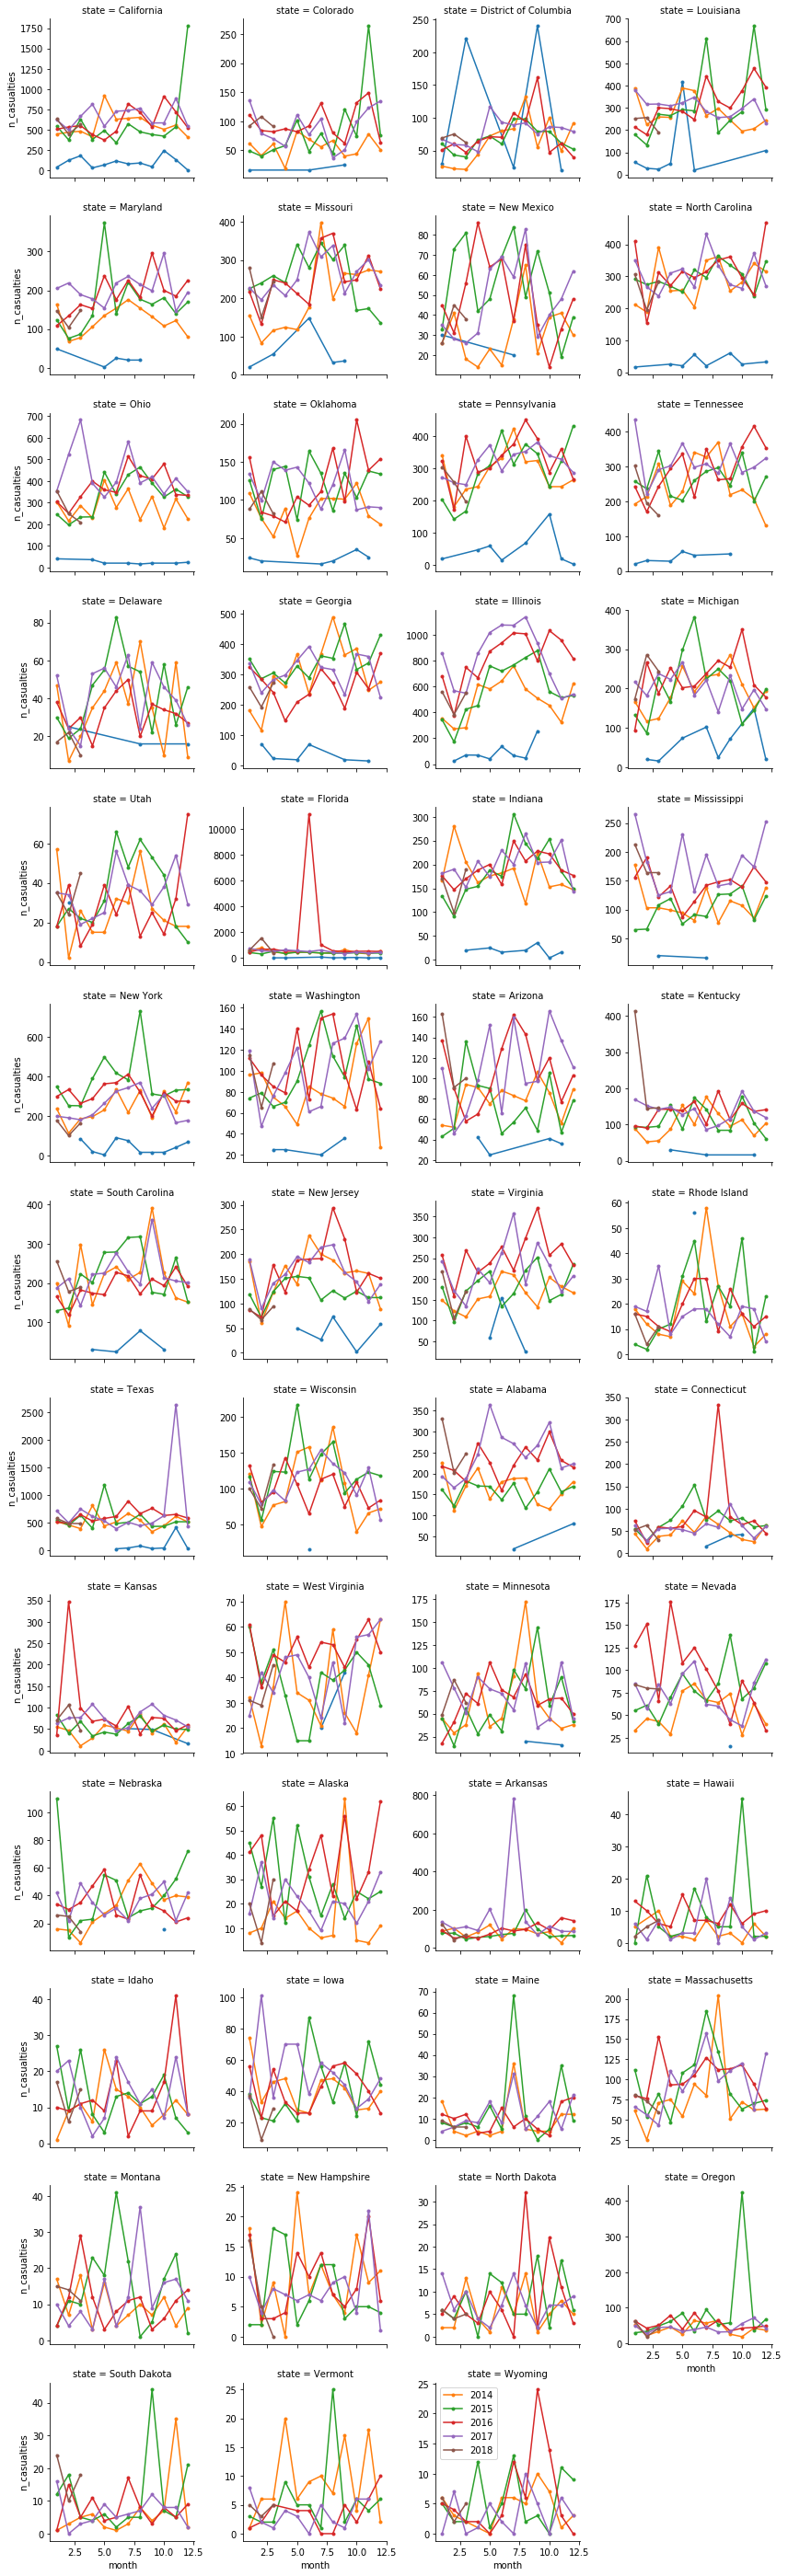

In [52]:
# Creating casualties over time per state by months
monthly_kills = table.groupby(['year','month', 'state']).agg('sum')
monthly_kills = monthly_kills['n_casualties'].reset_index()
monthly_kills.month = monthly_kills.month.astype(int)

g = sns.FacetGrid(monthly_kills, col='state', hue='year', col_wrap=4, sharey=False)
g = g.map(plt.plot, "month", "n_casualties", marker=".")
plt.legend(loc='best')
plt.show()

Alright, this visualisation hints to a poor data quality, particularly when looking at Florida, 2013's low and incomplete data and very low numbers for certain states like Sounth Dakota. Drawing any conclusions from this dataset wouldn't be very good, so we won't. 